In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
% cd /content/drive/MyDrive/ProjectAI
!ls

/content/drive/MyDrive/ProjectAI
Age_input_output      emotion_model.tflite  haarcascade_frontalface_default.xml
age_model.tflite      Gender_input_output   photo.jpg
Emotion_input_output  gender_model.tflite   Test_input


In [3]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

#the following are to do with this interactive notebook code

%matplotlib inline 
from matplotlib import pyplot as plt           # this lets you draw inline pictures in the notebooks
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [4]:
export_dir='./Age_input_output/output/age_model.h5'
age_model = load_model(export_dir)

# summarize model.
age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 average_pooling2d (AverageP  (None, 99, 99, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 23, 23, 128)      0

In [5]:
# load and evaluate a saved model
export_dir='./Gender_input_output/output/gender_model.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 70)        700       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 65)        41015     
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 65)       260       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 65)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 60)        35160 

In [6]:
export_dir='./Emotion_input_output/output/emotion_model.h5'
emotion_model = load_model(export_dir)

# summarize model.
emotion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [21]:
# Labels on Age, Gender and Emotion to be predicted
age_ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_ranges = ['male', 'female']
emotion_ranges= ['positive','negative','neutral']

In [22]:
img_path = "./Test_input/images/wd.jpg"

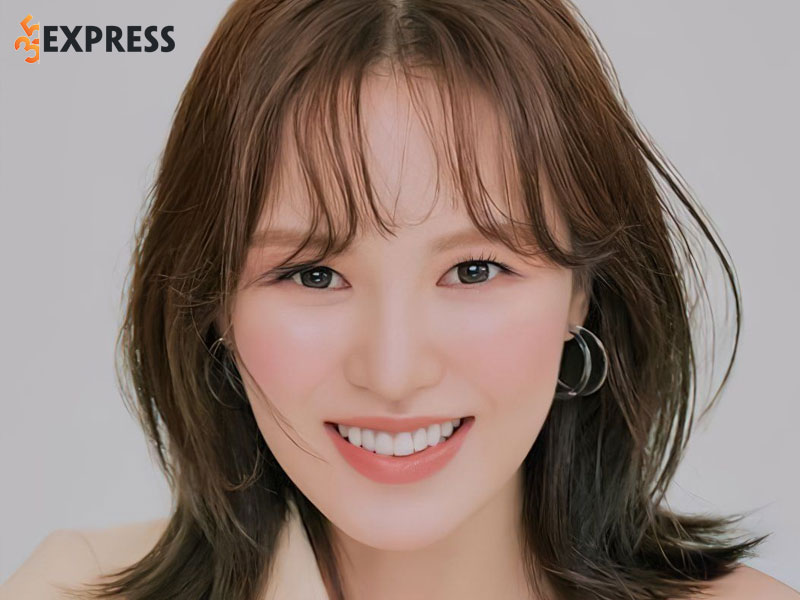

In [23]:
from IPython.display import Image 
pil_img = Image(filename=img_path)
display(pil_img)

1: female, 10-20, positive


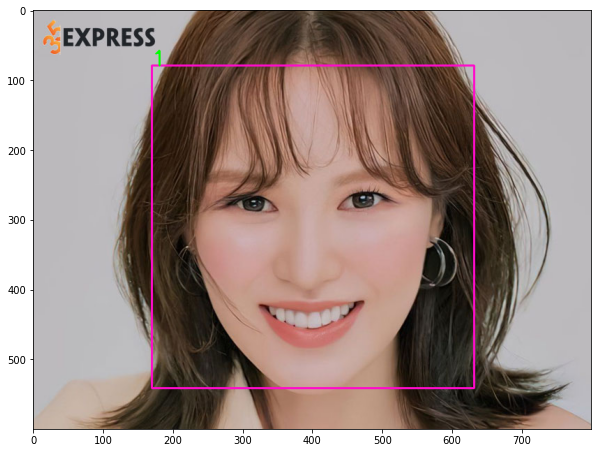

In [24]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('./Test_input/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]
  
  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [25]:
img_path2 = "./Test_input/images/boy.jpg"

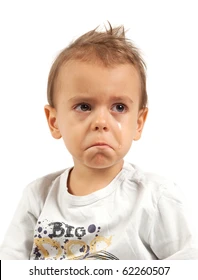

In [26]:
pil_img2 = Image(filename=img_path2)
display(pil_img2)

1: male, 3-9, negative


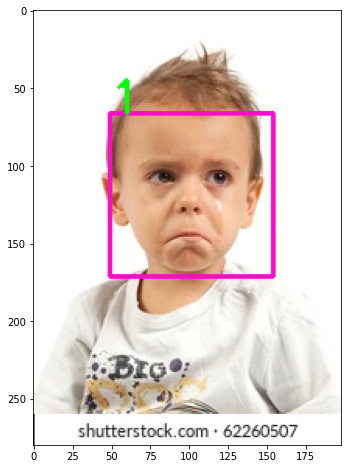

In [27]:
test_image2 = cv2.imread(img_path2)
gray = cv2.cvtColor(test_image2,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('./Test_input/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image2,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]
  
  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image2, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image2, cv2.COLOR_BGR2RGB))

In [28]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [29]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [30]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [31]:
def take_photo(filename='photo.jpg', quality=1):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # # get face bounding box coordinates using Haar Cascade
  # faces = face_cascade.detectMultiScale(gray)
  # # draw face bounding box on image
  # for (x,y,w,h) in faces:
  #     img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


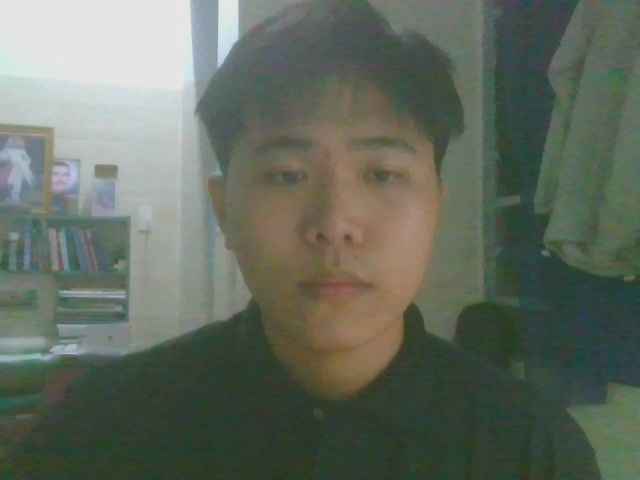

1: male, 21-27, neutral


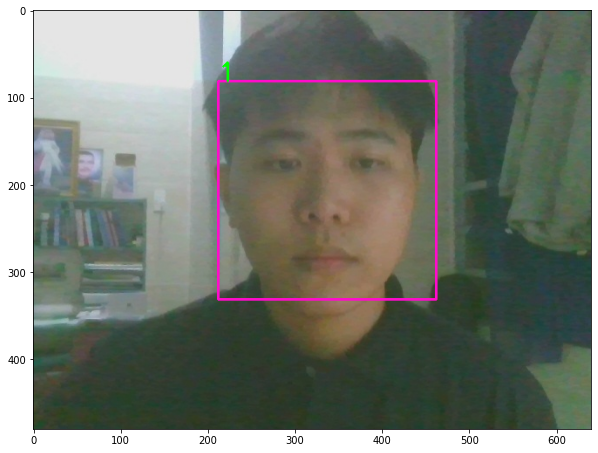

In [32]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


img_path3 = "photo.jpg"
pil_img3 = Image(filename=img_path3)

test_image3 = cv2.imread(img_path3)
gray = cv2.cvtColor(test_image3,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('./Test_input/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image3,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]
  
  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image3, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image3, cv2.COLOR_BGR2RGB))

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


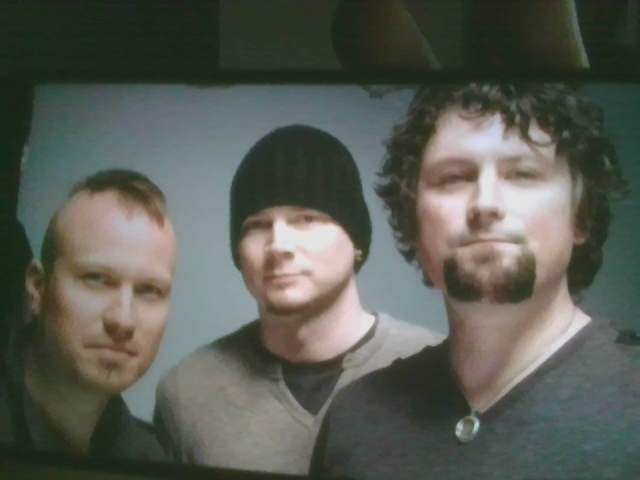

1: male, 21-27, positive
2: male, 28-45, positive
3: male, 28-45, neutral


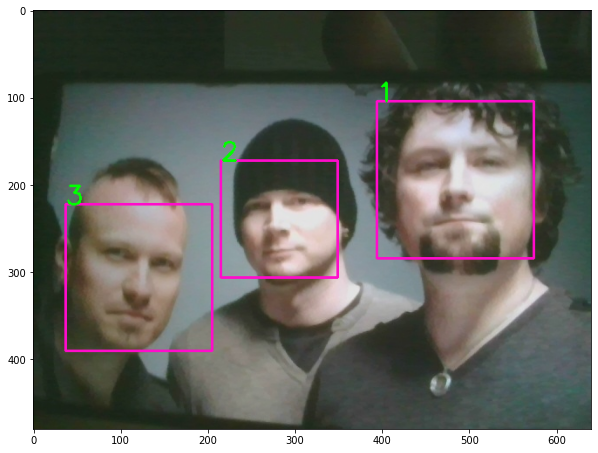

In [40]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


img_path3 = "photo.jpg"
pil_img3 = Image(filename=img_path3)

test_image3 = cv2.imread(img_path3)
gray = cv2.cvtColor(test_image3,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('./Test_input/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image3,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[y:y+h,x:x+w]

  emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
  emotion_image_array = np.array(emotion_img)
  emotion_input = np.expand_dims(emotion_image_array, axis=0)
  output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]
  
  gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
  gender_image_array = np.array(gender_img)
  gender_input = np.expand_dims(gender_image_array, axis=0)
  output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

  age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
  age_input = age_image.reshape(-1, 200, 200, 1)
  output_age = age_ranges[np.argmax(age_model.predict(age_input))]


  output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  print(output_str)
  
  col = (0,255,0)

  cv2.putText(test_image3, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image3, cv2.COLOR_BGR2RGB))